<a href="https://colab.research.google.com/github/edutms/uber_k-means_clustering/blob/main/Uber_divestment_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

In [7]:
#loading data

df_engagement = pd.read_excel('Rider_Engagement_.xlsx')


### EDA process

In [8]:
df_engagement.shape

(5054, 11)

In [9]:
df_engagement.describe()

,week,riders,shopping_session,request,trip,value_score_norm,churn_score_norm
count,5054,"5,054.00","5,054.00","5,054.00","5,054.00","5,054.00","5,054.00"
mean,2021-05-25 21:40:23.268698112,"19,208.22","77,877.14","55,017.61","51,161.19",0.13,0.85
min,2021-04-05 00:00:00,17.00,100.00,48.00,38.00,0.01,0.00
25%,2021-05-10 00:00:00,"1,951.50","8,241.25","5,571.00","5,055.25",0.07,0.82
50%,2021-05-31 00:00:00,"8,086.50","34,755.50","24,429.00","22,362.50",0.10,0.87
75%,2021-06-14 00:00:00,"22,558.50","92,442.75","64,529.25","59,633.00",0.16,0.92
max,2021-06-28 00:00:00,"352,159.00","1,300,476.00","952,047.00","898,739.00",1.00,0.99
std,NaN,"32,378.89","126,540.22","91,861.66","86,665.95",0.11,0.10


In [10]:
#checkin for duplicates
df_engagement.loc[df_engagement.duplicated()]

,week,city_name,Payment,Area,Device,riders,shopping_session,request,trip,value_score_norm,churn_score_norm


In [11]:
df_engagement.dtypes

week                datetime64[ns]
city_name                   object
Payment                     object
Area                        object
Device                      object
riders                       int64
shopping_session             int64
request                      int64
trip                         int64
value_score_norm           float64
churn_score_norm           float64
dtype: object

Investigating churn_score_norm to understand it's leading possibilities


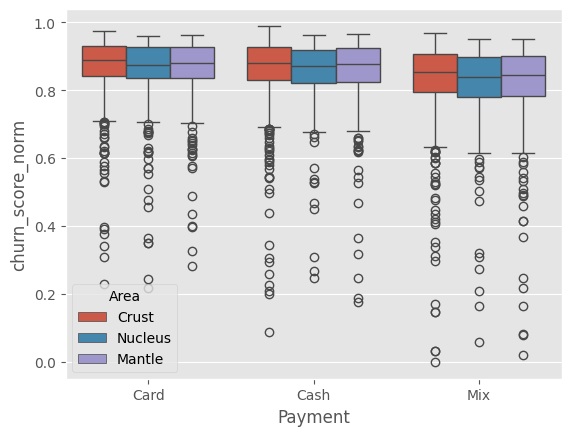

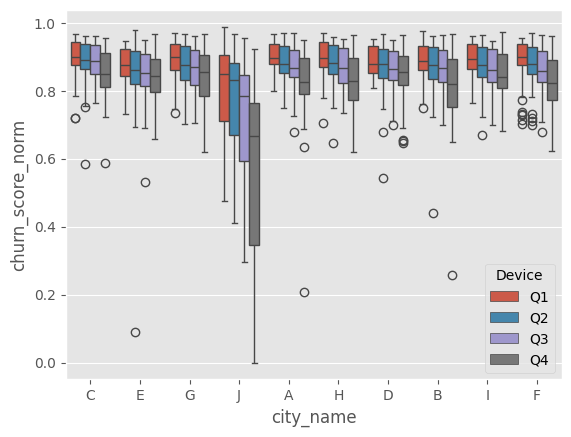

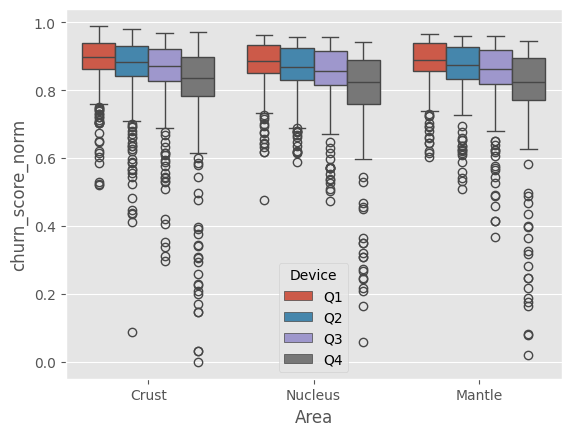

In [12]:
# prompt: plot the churn_score_norm based on City, Area, Device

import matplotlib.pyplot as plt
sns.boxplot(x="Payment", y="churn_score_norm", hue="Area", data=df_engagement)
plt.show()

sns.boxplot(x="city_name", y="churn_score_norm", hue="Device", data=df_engagement)
plt.show()

sns.boxplot(x="Area", y="churn_score_norm", hue="Device", data=df_engagement)
plt.show()

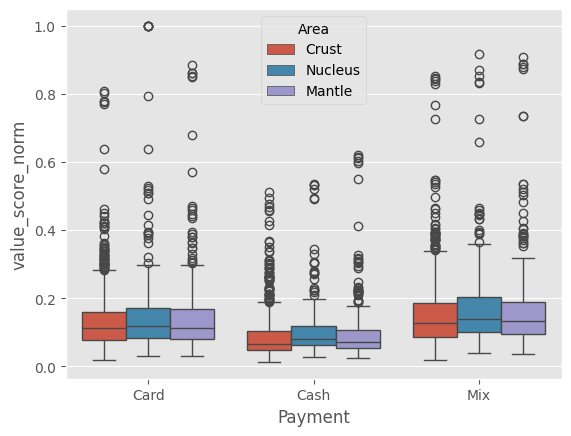

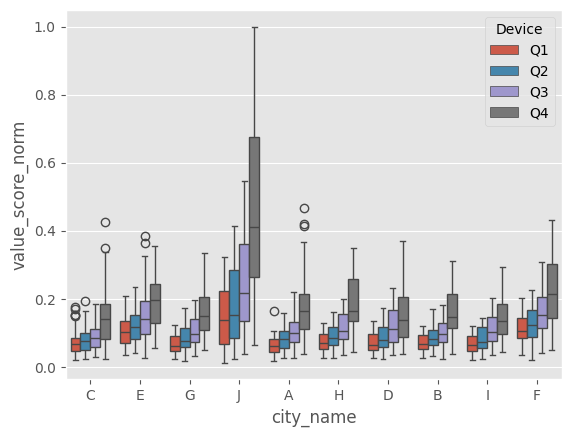

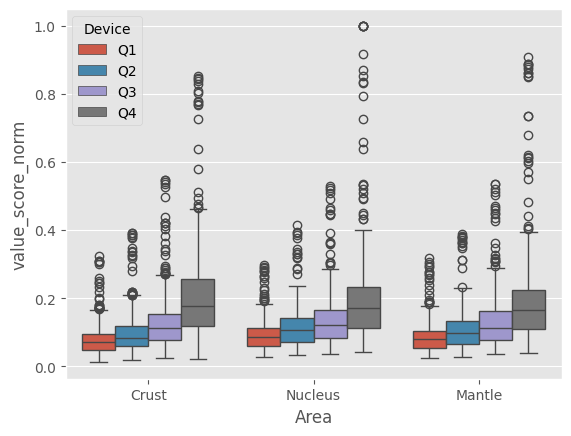

In [13]:
import matplotlib.pyplot as plt
sns.boxplot(x="Payment", y="value_score_norm", hue="Area", data=df_engagement)
plt.show()

sns.boxplot(x="city_name", y="value_score_norm", hue="Device", data=df_engagement)
plt.show()

sns.boxplot(x="Area", y="value_score_norm", hue="Device", data=df_engagement)
plt.show()

## Clustering the riders per type to create a fitted segmentation based on:
  -Area

  -city

  -churn_score

  -value_score

  -device type

### By doing so, we can fit the riders based on their scoring while also avoiding arbitrary values to score the riders as low or high value to Uber

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

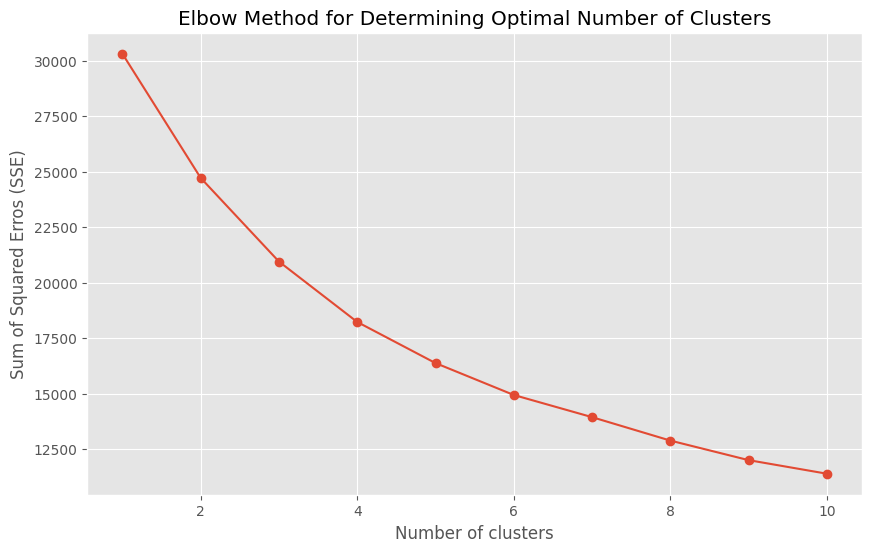

In [28]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

#encoding categorical values (area name to integer)
label_encoder_area = LabelEncoder()
label_encoder_device = LabelEncoder()
df_engagement['Area_encoded'] = label_encoder_area.fit_transform(df_engagement['Area'])
df_engagement['Device_encoded'] = df_engagement['Device'].str.replace('Q','')
df_engagement['City_encoded'] = label_encoder_area.fit_transform(df_engagement['city_name'])
df_engagement['payment_encoded'] = label_encoder_area.fit_transform(df_engagement['Payment'])

#selecting features to cluster
features = ['value_score_norm', 'churn_score_norm', 'Area_encoded', 'Device_encoded','City_encoded','payment_encoded']

#standartizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_engagement[features])

#finding the elbow for the dataframe
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_features)
    sse.append(kmeans.inertia_)

#plot the sum of squared errors (SSE)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Erros (SSE)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()

In [29]:
# subsetting to six clusters
optimal_k = 6
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(scaled_features)

# adding cluster labels to the dataframe
df_engagement['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
cluster_summary = df_engagement.groupby('Cluster').agg(
    avg_value_score=('value_score_norm', 'mean'),
    avg_churn_score=('churn_score_norm', 'mean')
).reset_index()
cluster_summary['composite_score'] = cluster_summary['avg_value_score'] - cluster_summary['avg_churn_score']
# Define thresholds for classification (these can be adjusted based on analysis)
high_value_threshold = cluster_summary['composite_score'].quantile(0.67)
low_value_threshold = cluster_summary['composite_score'].quantile(0.33)

# Classify clusters based on thresholds
cluster_summary['cluster_classification'] = np.where(
    cluster_summary['composite_score'] >= high_value_threshold, 'High Value',
    np.where(
        cluster_summary['composite_score'] <= low_value_threshold, 'Low Value',
        'Moderate Value'
    )
)

In [31]:
cluster_summary

,Cluster,avg_value_score,avg_churn_score,composite_score,cluster_classification
0,0,0.11,0.87,-0.76,Moderate Value
1,1,0.08,0.89,-0.81,Low Value
2,2,0.09,0.89,-0.80,Low Value
3,3,0.51,0.48,0.03,High Value
4,4,0.20,0.80,-0.60,High Value
5,5,0.14,0.87,-0.73,Moderate Value


In [32]:
df_engagement.groupby('Cluster')[['churn_score_norm','value_score_norm']].mean().sort_values(ascending=False,by='value_score_norm')

,churn_score_norm,value_score_norm
Cluster,,
3,0.48,0.51
4,0.80,0.20
5,0.87,0.14
0,0.87,0.11
2,0.89,0.09
1,0.89,0.08


To accomodate the riders and city locations, we will consider the clusters 2 and 5 as **high value** riders, clusters 3 and 0 as **moderate value** riders,and clusters 1 and 4 as **low value** riders. This is based both on the average churn_score and value_score of these clusters after grouping.

In [33]:
df_engagement['cluster_classification'] = df_engagement['Cluster'].apply(lambda x: 'High Value' if x in [3, 4] else ('Moderate Value' if x in [5, 0] else 'Low Value'))

In [34]:
df_engagement

,week,city_name,Payment,Area,Device,riders,shopping_session,request,trip,value_score_norm,churn_score_norm,Area_encoded,Device_encoded,City_encoded,Cluster,cluster_classification,payment_encoded
0,2021-04-05,C,Card,Crust,Q1,30,101,82,80,0.09,0.89,0,1,2,1,Low Value,0
1,2021-04-05,E,Cash,Crust,Q2,19,107,65,59,0.09,0.09,0,2,4,3,High Value,1
2,2021-04-05,C,Mix,Crust,Q1,39,108,60,56,0.05,0.72,0,1,2,1,Low Value,2
3,2021-04-05,C,Mix,Crust,Q3,35,113,70,63,0.11,0.84,0,3,2,1,Low Value,2
4,2021-04-05,E,Card,Crust,Q3,28,114,103,94,0.08,0.91,0,3,4,5,Moderate Value,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2021-06-28,H,Card,Crust,Q2,149259,620052,453558,427646,0.11,0.85,0,2,7,2,Low Value,0
5050,2021-06-28,J,Mix,Crust,Q2,173268,673383,461157,419862,0.38,0.48,0,2,9,3,High Value,2
5051,2021-06-28,H,Card,Mantle,Q2,175045,709472,521342,497373,0.11,0.85,1,2,7,2,Low Value,0
5052,2021-06-28,J,Card,Mantle,Q2,278086,1076134,790474,745593,0.35,0.61,1,2,9,3,High Value,0


In [ ]:
df_engagement[]

## Analysing the coverage of the clusters in the cities

### Let's first subset to the last week of the dataframe to understand the clustering impact on a fixed timeframe

In [35]:
df_lastweek = df_engagement.loc[df_engagement['week'] == df_engagement['week'].max()]
df_lastweek

,week,city_name,Payment,Area,Device,riders,shopping_session,request,trip,value_score_norm,churn_score_norm,Area_encoded,Device_encoded,City_encoded,Cluster,cluster_classification,payment_encoded
4538,2021-06-28,G,Card,Crust,Q3,31,101,83,73,0.09,0.91,0,3,6,5,Moderate Value,0
4539,2021-06-28,G,Card,Crust,Q1,41,102,55,48,0.03,0.92,0,1,6,2,Low Value,0
4540,2021-06-28,G,Mix,Crust,Q3,25,103,63,54,0.10,0.94,0,3,6,4,High Value,2
4541,2021-06-28,J,Card,Crust,Q2,34,104,83,80,0.13,0.90,0,2,9,2,Low Value,0
4542,2021-06-28,G,Cash,Crust,Q1,38,105,67,62,0.03,0.92,0,1,6,2,Low Value,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5049,2021-06-28,H,Card,Crust,Q2,149259,620052,453558,427646,0.11,0.85,0,2,7,2,Low Value,0
5050,2021-06-28,J,Mix,Crust,Q2,173268,673383,461157,419862,0.38,0.48,0,2,9,3,High Value,2
5051,2021-06-28,H,Card,Mantle,Q2,175045,709472,521342,497373,0.11,0.85,1,2,7,2,Low Value,0
5052,2021-06-28,J,Card,Mantle,Q2,278086,1076134,790474,745593,0.35,0.61,1,2,9,3,High Value,0


In [39]:
df_engagement.groupby('cluster_classification')[['value_score_norm','churn_score_norm']].mean().sort_values(ascending=False,by='value_score_norm')

,value_score_norm,churn_score_norm
cluster_classification,,
High Value,0.25,0.74
Moderate Value,0.13,0.87
Low Value,0.08,0.89


In [22]:
pd.options.display.float_format = '{:,.2f}'.format
pd.DataFrame(df_lastweek.groupby(['cluster_classification','city_name'])['riders'].sum()).reset_index()

,cluster_classification,city_name,riders
0,High Value,A,14474
1,High Value,B,31197
2,High Value,C,13854
3,High Value,D,36827
4,High Value,E,19770
5,High Value,F,62732
6,High Value,G,67487
7,High Value,H,406035
8,High Value,I,59924
9,High Value,J,2098903


In [38]:
pd.DataFrame(df_engagement.groupby(['cluster_classification'])['riders'].sum()).reset_index()

,cluster_classification,riders
0,High Value,20660372
1,Low Value,45854413
2,Moderate Value,30563548


## Exporting data to Excel

In [42]:
df_engagement.to_excel('divestiment_uber.xlsx')